# Political Ads Visualizations

In [193]:
import pprint
import pickle
import pandas as pd
from datetime import datetime
import numpy as np
import string
from collections import Counter
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

pd.set_option("display.max_columns", 2000)
pd.set_option("display.max_rows", 2000)

In [2]:
pres_df = pd.read_pickle('data/pres_sorted_data.pickle')
pres_df.head()

id  wp_identifier network                          location  \
0   1           5643    KLAS                     Las Vegas, NV   
1   2           5643    WNCN  Raleigh-Durham-Fayetteville,  NC   
2   3           5643    KLAS                     Las Vegas, NV   
3   4           5643    WFLA          Tampa-St. Petersburg, FL   
4   5           5643    KSNV                     Las Vegas, NV   

                                  program program_type          start_time  \
0                      8 News Now at 5 PM         news 2016-09-09 00:12:59   
1            North Carolina News at 500PM         news 2016-09-06 21:58:25   
2                         Face the Nation         news 2016-09-04 16:24:25   
3                       Days of Our Lives     not news 2016-08-30 17:59:20   
4  The Tonight Show Starring Jimmy Fallon         news 2016-09-06 07:02:22   

             end_time                  archive_id  \
0 2016-09-09 00:13:29  PolAd_HillaryClinton_f1h3j   
1 2016-09-06 21:58:55  PolAd_HillaryClinton_f1h3j   
2 2016-09-04 16:24:55  PolAd_HillaryClinton_f1h3j   
3 2016-08-30 17:59:50  PolAd_HillaryClinton_f1h3j   
4 2016-09-06 07:02:52  PolAd_HillaryClinton_f1h3j   

                                           embed_url             sponsors  \
0  https://archive.org/embed/PolAd_HillaryClinton...  Hillary for America   
1  https://archive.org/embed/PolAd_HillaryClinton...  Hillary for America   
2  https://archive.org/embed/PolAd_HillaryClinton...  Hillary for America   
3  https://archive.org/embed/PolAd_HillaryClinton...  Hillary for America   
4  https://archive.org/embed/PolAd_HillaryClinton...  Hillary for America   

  sponsor_types  race   cycle             subjects       candidates      type  \
0      Multiple  PRES  2016.0  Energy, China, Jobs  Hillary Clinton  campaign   
1      Multiple  PRES  2016.0  Energy, China, Jobs  Hillary Clinton  campaign   
2      Multiple  PRES  2016.0  Energy, China, Jobs  Hillary Clinton  campaign   
3      Multiple  PRES  2016.0  Energy, China, Jobs  Hillary Clinton  campaign   
4      Multiple  PRES  2016.0  Energy, China, Jobs  Hillary Clinton  campaign   

  message        date_created  ad_length day_of_week  \
0     pro 2016-09-12 14:49:32       30.0      Friday   
1     pro 2016-09-12 14:49:32       30.0     Tuesday   
2     pro 2016-09-12 14:49:32       30.0      Sunday   
3     pro 2016-09-12 14:49:32       30.0     Tuesday   
4     pro 2016-09-12 14:49:32       30.0     Tuesday   

                    metro_area state  subject_count  
0                    Las Vegas    NV            3.0  
1  Raleigh-Durham-Fayetteville    NC            3.0  
2                    Las Vegas    NV            3.0  
3         Tampa-St. Petersburg    FL            3.0  
4                    Las Vegas    NV            3.0

In [6]:
# creating 'hour_aired' - day of week that ad aired

pres_df['hour_aired'] = pres_df['start_time'].map(lambda x: int(x.strftime("%H")))
pres_df.head(5)

id  wp_identifier network                          location  \
0   1           5643    KLAS                     Las Vegas, NV   
1   2           5643    WNCN  Raleigh-Durham-Fayetteville,  NC   
2   3           5643    KLAS                     Las Vegas, NV   
3   4           5643    WFLA          Tampa-St. Petersburg, FL   
4   5           5643    KSNV                     Las Vegas, NV   

                                  program program_type          start_time  \
0                      8 News Now at 5 PM         news 2016-09-09 00:12:59   
1            North Carolina News at 500PM         news 2016-09-06 21:58:25   
2                         Face the Nation         news 2016-09-04 16:24:25   
3                       Days of Our Lives     not news 2016-08-30 17:59:20   
4  The Tonight Show Starring Jimmy Fallon         news 2016-09-06 07:02:22   

             end_time                  archive_id  \
0 2016-09-09 00:13:29  PolAd_HillaryClinton_f1h3j   
1 2016-09-06 21:58:55  PolAd_HillaryClinton_f1h3j   
2 2016-09-04 16:24:55  PolAd_HillaryClinton_f1h3j   
3 2016-08-30 17:59:50  PolAd_HillaryClinton_f1h3j   
4 2016-09-06 07:02:52  PolAd_HillaryClinton_f1h3j   

                                           embed_url             sponsors  \
0  https://archive.org/embed/PolAd_HillaryClinton...  Hillary for America   
1  https://archive.org/embed/PolAd_HillaryClinton...  Hillary for America   
2  https://archive.org/embed/PolAd_HillaryClinton...  Hillary for America   
3  https://archive.org/embed/PolAd_HillaryClinton...  Hillary for America   
4  https://archive.org/embed/PolAd_HillaryClinton...  Hillary for America   

  sponsor_types  race   cycle             subjects       candidates      type  \
0      Multiple  PRES  2016.0  Energy, China, Jobs  Hillary Clinton  campaign   
1      Multiple  PRES  2016.0  Energy, China, Jobs  Hillary Clinton  campaign   
2      Multiple  PRES  2016.0  Energy, China, Jobs  Hillary Clinton  campaign   
3      Multiple  PRES  2016.0  Energy, China, Jobs  Hillary Clinton  campaign   
4      Multiple  PRES  2016.0  Energy, China, Jobs  Hillary Clinton  campaign   

  message        date_created  ad_length day_of_week  \
0     pro 2016-09-12 14:49:32       30.0      Friday   
1     pro 2016-09-12 14:49:32       30.0     Tuesday   
2     pro 2016-09-12 14:49:32       30.0      Sunday   
3     pro 2016-09-12 14:49:32       30.0     Tuesday   
4     pro 2016-09-12 14:49:32       30.0     Tuesday   

                    metro_area state  subject_count  hour_aired  
0                    Las Vegas    NV            3.0           0  
1  Raleigh-Durham-Fayetteville    NC            3.0          21  
2                    Las Vegas    NV            3.0          16  
3         Tampa-St. Petersburg    FL            3.0          17  
4                    Las Vegas    NV            3.0           7

In [7]:
pres_df['hour_aired'].dtypes

dtype('int64')

In [11]:
pres_df['subjects'][0], type(pres_df['subjects'][0])

('Energy, China, Jobs', str)

In [12]:
pres_df['subjects'][0].split()

['Energy,', 'China,', 'Jobs']

In [13]:
# Creating a list of topics and then get a counter dictionary

# first convert to strings

pres_df['split_subjects_tmp'] = pres_df['subjects'].map(lambda x: str(x).split(','))
pres_df.head(5)

id  wp_identifier network                          location  \
0   1           5643    KLAS                     Las Vegas, NV   
1   2           5643    WNCN  Raleigh-Durham-Fayetteville,  NC   
2   3           5643    KLAS                     Las Vegas, NV   
3   4           5643    WFLA          Tampa-St. Petersburg, FL   
4   5           5643    KSNV                     Las Vegas, NV   

                                  program program_type          start_time  \
0                      8 News Now at 5 PM         news 2016-09-09 00:12:59   
1            North Carolina News at 500PM         news 2016-09-06 21:58:25   
2                         Face the Nation         news 2016-09-04 16:24:25   
3                       Days of Our Lives     not news 2016-08-30 17:59:20   
4  The Tonight Show Starring Jimmy Fallon         news 2016-09-06 07:02:22   

             end_time                  archive_id  \
0 2016-09-09 00:13:29  PolAd_HillaryClinton_f1h3j   
1 2016-09-06 21:58:55  PolAd_HillaryClinton_f1h3j   
2 2016-09-04 16:24:55  PolAd_HillaryClinton_f1h3j   
3 2016-08-30 17:59:50  PolAd_HillaryClinton_f1h3j   
4 2016-09-06 07:02:52  PolAd_HillaryClinton_f1h3j   

                                           embed_url             sponsors  \
0  https://archive.org/embed/PolAd_HillaryClinton...  Hillary for America   
1  https://archive.org/embed/PolAd_HillaryClinton...  Hillary for America   
2  https://archive.org/embed/PolAd_HillaryClinton...  Hillary for America   
3  https://archive.org/embed/PolAd_HillaryClinton...  Hillary for America   
4  https://archive.org/embed/PolAd_HillaryClinton...  Hillary for America   

  sponsor_types  race   cycle             subjects       candidates      type  \
0      Multiple  PRES  2016.0  Energy, China, Jobs  Hillary Clinton  campaign   
1      Multiple  PRES  2016.0  Energy, China, Jobs  Hillary Clinton  campaign   
2      Multiple  PRES  2016.0  Energy, China, Jobs  Hillary Clinton  campaign   
3      Multiple  PRES  2016.0  Energy, China, Jobs  Hillary Clinton  campaign   
4      Multiple  PRES  2016.0  Energy, China, Jobs  Hillary Clinton  campaign   

  message        date_created  ad_length day_of_week  \
0     pro 2016-09-12 14:49:32       30.0      Friday   
1     pro 2016-09-12 14:49:32       30.0     Tuesday   
2     pro 2016-09-12 14:49:32       30.0      Sunday   
3     pro 2016-09-12 14:49:32       30.0     Tuesday   
4     pro 2016-09-12 14:49:32       30.0     Tuesday   

                    metro_area state  subject_count  hour_aired  \
0                    Las Vegas    NV            3.0           0   
1  Raleigh-Durham-Fayetteville    NC            3.0          21   
2                    Las Vegas    NV            3.0          16   
3         Tampa-St. Petersburg    FL            3.0          17   
4                    Las Vegas    NV            3.0           7   

        split_subjects_tmp  
0  [Energy,  China,  Jobs]  
1  [Energy,  China,  Jobs]  
2  [Energy,  China,  Jobs]  
3  [Energy,  China,  Jobs]  
4  [Energy,  China,  Jobs]

In [23]:
sub_list = pres_df['split_subjects_tmp'].tolist()

In [25]:
sub_list[0:5]

[['Energy', ' China', ' Jobs'],
 ['Energy', ' China', ' Jobs'],
 ['Energy', ' China', ' Jobs'],
 ['Energy', ' China', ' Jobs'],
 ['Energy', ' China', ' Jobs']]

In [28]:
subject_list = []

for sub in sub_list:
    for s in sub:
        subject_list.append(s.strip())

In [29]:
subject_list

['Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',

In [60]:
unique_subjects = set(subject_list)
len(unique_subjects)

72

In [31]:
subject_count = Counter(subject_list)
subject_count

Counter({'Abortion': 2180,
         'Bankruptcy': 195,
         'Bipartisanship': 8187,
         'Campaign Finance': 291,
         'Canddate Biography': 134,
         'Candidate Biography': 54772,
         'Children': 20532,
         'China': 4127,
         'Civil Rights': 8511,
         'Climate Change': 477,
         'Corporations': 1,
         'Crime': 5058,
         'Criminal Justice': 2153,
         'Debates': 105,
         'Debt': 1580,
         'Disability': 9019,
         'Diversity': 110,
         'Drugs': 7,
         'Economy': 11223,
         'Education': 2262,
         'Election': 60,
         'Elections': 167,
         'Energy': 2353,
         'Environment': 810,
         'Ethics': 1,
         'Families': 11632,
         'Federal Budget': 3259,
         'Foreign Policy': 19497,
         'Gambling': 1,
         'Gays and Lesbians': 1825,
         'Guns': 1730,
         'Health Care': 3671,
         'Homeland Security': 3617,
         'Housing': 90,
         'Immigration': 8

In [35]:
# sorting the counting dictionary

sorted(subject_count.items(), key=lambda x: x[1], reverse=True)

[('Candidate Biography', 54772),
 ('Jobs', 20686),
 ('Children', 20532),
 ('Foreign Policy', 19497),
 ('Terrorism', 19304),
 ('Military', 16643),
 ('Women', 15440),
 ('Taxes', 12285),
 ('Families', 11632),
 ('Economy', 11223),
 ('Nuclear', 9577),
 ('Disability', 9019),
 ('Immigration', 8918),
 ('Civil Rights', 8511),
 ('Veterans', 8265),
 ('Bipartisanship', 8187),
 ('Crime', 5058),
 ('China', 4127),
 ('Trade', 4091),
 ('Health Care', 3671),
 ('Homeland Security', 3617),
 ('Islam', 3392),
 ('Federal Budget', 3259),
 ('Workers', 3221),
 ('Legal Issues', 2835),
 ('Energy', 2353),
 ('Education', 2262),
 ('Abortion', 2180),
 ('Criminal Justice', 2153),
 ('Iran', 1943),
 ('Gays and Lesbians', 1825),
 ('Guns', 1730),
 ('Debt', 1580),
 ('Iraq', 1527),
 ('Religion', 1488),
 ('Income', 1484),
 ('Social Security', 1249),
 ('Small Business', 887),
 ('Environment', 810),
 ('Poverty', 612),
 ('nan', 591),
 ('Voting Record', 554),
 ('Supreme Court', 536),
 ('Climate Change', 477),
 ('Police', 393),
 

In [54]:
# Converting counting dictionary to dataframe (practice)

subject_df = pd.DataFrame.from_dict(subject_count, orient='index')
subject_df.head()

0
Bankruptcy        195
Women           15440
Foreign Policy  19497
Corporations        1
Climate Change    477

In [55]:
# renaming column

subject_df.rename(columns={subject_df.columns[0]:'Count'}, inplace=True)

In [56]:
subject_df.head()

Count
Bankruptcy        195
Women           15440
Foreign Policy  19497
Corporations        1
Climate Change    477

In [58]:
# sorting the `subject_df`

subject_df.sort_values('Count', ascending=False, inplace=True)
subject_df.head(10)

Count
Candidate Biography  54772
Jobs                 20686
Children             20532
Foreign Policy       19497
Terrorism            19304
Military             16643
Women                15440
Taxes                12285
Families             11632
Economy              11223

In [64]:
subject_df['%_total'] = (subject_df['Count'] / subject_df['Count'].sum()) * 100
subject_df.head()

Count    %_total
Candidate Biography  54772  17.302686
Jobs                 20686   6.534787
Children             20532   6.486138
Foreign Policy       19497   6.159178
Terrorism            19304   6.098208

### Preliminary Visualizations

In [65]:
pres_df.head()

id  wp_identifier network                          location  \
0   1           5643    KLAS                     Las Vegas, NV   
1   2           5643    WNCN  Raleigh-Durham-Fayetteville,  NC   
2   3           5643    KLAS                     Las Vegas, NV   
3   4           5643    WFLA          Tampa-St. Petersburg, FL   
4   5           5643    KSNV                     Las Vegas, NV   

                                  program program_type          start_time  \
0                      8 News Now at 5 PM         news 2016-09-09 00:12:59   
1            North Carolina News at 500PM         news 2016-09-06 21:58:25   
2                         Face the Nation         news 2016-09-04 16:24:25   
3                       Days of Our Lives     not news 2016-08-30 17:59:20   
4  The Tonight Show Starring Jimmy Fallon         news 2016-09-06 07:02:22   

             end_time                  archive_id  \
0 2016-09-09 00:13:29  PolAd_HillaryClinton_f1h3j   
1 2016-09-06 21:58:55  PolAd_HillaryClinton_f1h3j   
2 2016-09-04 16:24:55  PolAd_HillaryClinton_f1h3j   
3 2016-08-30 17:59:50  PolAd_HillaryClinton_f1h3j   
4 2016-09-06 07:02:52  PolAd_HillaryClinton_f1h3j   

                                           embed_url             sponsors  \
0  https://archive.org/embed/PolAd_HillaryClinton...  Hillary for America   
1  https://archive.org/embed/PolAd_HillaryClinton...  Hillary for America   
2  https://archive.org/embed/PolAd_HillaryClinton...  Hillary for America   
3  https://archive.org/embed/PolAd_HillaryClinton...  Hillary for America   
4  https://archive.org/embed/PolAd_HillaryClinton...  Hillary for America   

  sponsor_types  race   cycle             subjects       candidates      type  \
0      Multiple  PRES  2016.0  Energy, China, Jobs  Hillary Clinton  campaign   
1      Multiple  PRES  2016.0  Energy, China, Jobs  Hillary Clinton  campaign   
2      Multiple  PRES  2016.0  Energy, China, Jobs  Hillary Clinton  campaign   
3      Multiple  PRES  2016.0  Energy, China, Jobs  Hillary Clinton  campaign   
4      Multiple  PRES  2016.0  Energy, China, Jobs  Hillary Clinton  campaign   

  message        date_created  ad_length day_of_week  \
0     pro 2016-09-12 14:49:32       30.0      Friday   
1     pro 2016-09-12 14:49:32       30.0     Tuesday   
2     pro 2016-09-12 14:49:32       30.0      Sunday   
3     pro 2016-09-12 14:49:32       30.0     Tuesday   
4     pro 2016-09-12 14:49:32       30.0     Tuesday   

                    metro_area state  subject_count  hour_aired  \
0                    Las Vegas    NV            3.0           0   
1  Raleigh-Durham-Fayetteville    NC            3.0          21   
2                    Las Vegas    NV            3.0          16   
3         Tampa-St. Petersburg    FL            3.0          17   
4                    Las Vegas    NV            3.0           7   

        split_subjects_tmp  
0  [Energy,  China,  Jobs]  
1  [Energy,  China,  Jobs]  
2  [Energy,  China,  Jobs]  
3  [Energy,  China,  Jobs]  
4  [Energy,  China,  Jobs]

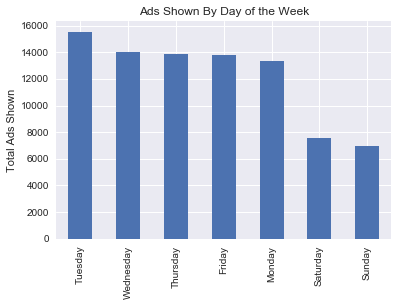

In [192]:
pres_df['day_of_week'].value_counts().plot(kind='bar')
plt.title("Ads Shown By Day of the Week")
plt.ylabel("Total Ads Shown")
# plt.savefig('proposal_pics/ads_by_dow.png') # needs to be in the same cell as the code that generates the chart

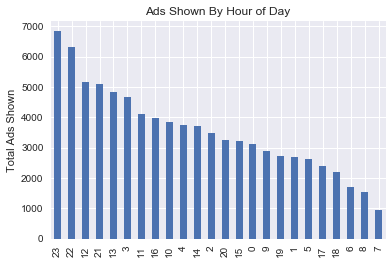

In [191]:
pres_df['hour_aired'].value_counts().plot(kind='bar')
plt.title("Ads Shown By Hour of Day")
plt.ylabel("Total Ads Shown")
# plt.savefig('proposal_pics/ads_by_hour.png')

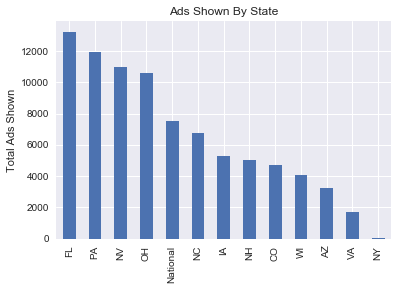

In [190]:
pres_df['state'].value_counts().plot(kind='bar')
plt.title("Ads Shown By State")
plt.ylabel("Total Ads Shown")
# plt.savefig('proposal_pics/ads_by_state.png')

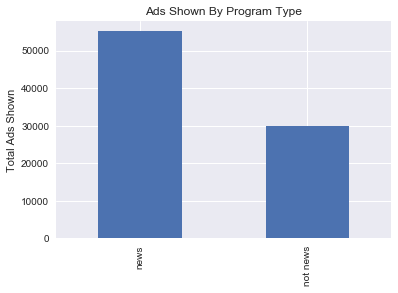

In [189]:
pres_df['program_type'].value_counts().plot(kind='bar')
plt.title("Ads Shown By Program Type")
plt.ylabel("Total Ads Shown")
# plt.savefig('proposal_pics/ads_by_program_type.png')

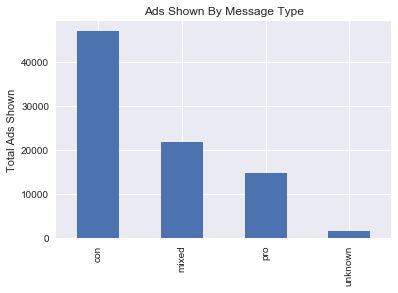

In [188]:
pres_df['message'].value_counts().plot(kind='bar')
plt.title("Ads Shown By Message Type")
plt.ylabel("Total Ads Shown")
# plt.savefig('proposal_pics/ads_by_message_type.png')

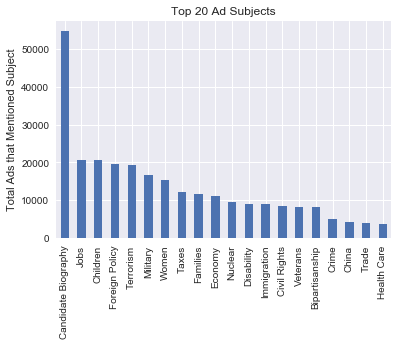

In [187]:
subject_df['Count'].head(20).plot(kind='bar')
plt.title("Top 20 Ad Subjects")
plt.ylabel("Total Ads that Mentioned Subject")
# plt.savefig('proposal_pics/top_20_ad_subjects.png')

# Interesting how far down the list Immigration and Trade are

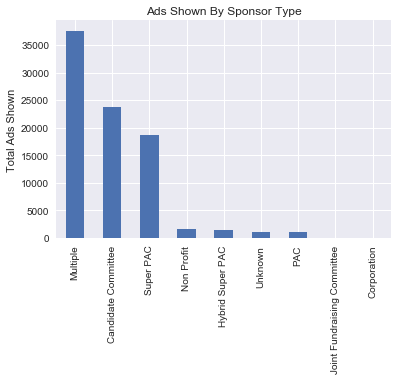

In [186]:
pres_df['sponsor_types'].value_counts().plot(kind='bar')
plt.title("Ads Shown By Sponsor Type")
plt.ylabel("Total Ads Shown")
# plt.savefig('proposal_pics/ads_by_sponsor_type.png')

## Setting Index to Date

- see Python Data Science Handbook, Chapter 3, page 202 - Seattle Bicycle Counts example
- see "Time Series/Date" section of the Pandas online documentation: *http://pandas.pydata.org/pandas-docs/stable/timeseries.html*
- *Python for Data Analysis* by Wes McKinney

In [91]:
pres_date_df = pres_df.copy()
pres_date_df.head(2)

id  wp_identifier network                          location  \
0   1           5643    KLAS                     Las Vegas, NV   
1   2           5643    WNCN  Raleigh-Durham-Fayetteville,  NC   

                        program program_type          start_time  \
0            8 News Now at 5 PM         news 2016-09-09 00:12:59   
1  North Carolina News at 500PM         news 2016-09-06 21:58:25   

             end_time                  archive_id  \
0 2016-09-09 00:13:29  PolAd_HillaryClinton_f1h3j   
1 2016-09-06 21:58:55  PolAd_HillaryClinton_f1h3j   

                                           embed_url             sponsors  \
0  https://archive.org/embed/PolAd_HillaryClinton...  Hillary for America   
1  https://archive.org/embed/PolAd_HillaryClinton...  Hillary for America   

  sponsor_types  race   cycle             subjects       candidates      type  \
0      Multiple  PRES  2016.0  Energy, China, Jobs  Hillary Clinton  campaign   
1      Multiple  PRES  2016.0  Energy, China, Jobs  Hillary Clinton  campaign   

  message        date_created  ad_length day_of_week  \
0     pro 2016-09-12 14:49:32       30.0      Friday   
1     pro 2016-09-12 14:49:32       30.0     Tuesday   

                    metro_area state  subject_count  hour_aired  \
0                    Las Vegas    NV            3.0           0   
1  Raleigh-Durham-Fayetteville    NC            3.0          21   

        split_subjects_tmp  
0  [Energy,  China,  Jobs]  
1  [Energy,  China,  Jobs]

In [92]:
# start_time column was not sorted -- sorting here in ascending order

pres_date_df.sort_values('start_time', ascending=True, inplace=True)
pres_date_df.head(10)

id  wp_identifier   network                            location  \
207673  261456           6035  FOXNEWSW  San Francisco-Oakland-San Jose, CA   
207667  261450           6035  FOXNEWSW  San Francisco-Oakland-San Jose, CA   
34380    48222           4176      WCAU                    Philadelphia, PA   
34553    48395           4176       KYW                    Philadelphia, PA   
279413  378441           7459    MSNBCW  San Francisco-Oakland-San Jose, CA   
34552    48394           4176      WCAU                    Philadelphia, PA   
279420  378448           7459    MSNBCW  San Francisco-Oakland-San Jose, CA   
207674  261457           6035    MSNBCW  San Francisco-Oakland-San Jose, CA   
279418  378446           7459    MSNBCW  San Francisco-Oakland-San Jose, CA   
34551    48393           4176      WTXF                    Philadelphia, PA   

                                      program program_type  \
207673  On the Record With Greta Van Susteren         news   
207667     Fox News Sunday With Chris Wallace         news   
34380               NBC10 News Today at 430am         news   
34553                  Eyewitness News at 430         news   
279413                             First Look         news   
34552                 NBC10 News Today at 5am         news   
279420                          Way Too Early         news   
207674                            Morning Joe         news   
279418                            Morning Joe         news   
34551             Good Day Philadelphia at 6A         news   

                start_time            end_time                  archive_id  \
207673 2016-08-01 01:19:59 2016-08-01 01:21:04  PolAd_HillaryClinton_4drmd   
207667 2016-08-01 06:20:04 2016-08-01 06:21:09  PolAd_HillaryClinton_4drmd   
34380  2016-08-01 08:39:49 2016-08-01 08:40:21     PolAd_DonaldTrump_99k4w   
34553  2016-08-01 08:48:14 2016-08-01 08:48:46     PolAd_DonaldTrump_99k4w   
279413 2016-08-01 09:09:45 2016-08-01 09:10:15  PolAd_HillaryClinton_4gvic   
34552  2016-08-01 09:24:05 2016-08-01 09:24:37     PolAd_DonaldTrump_99k4w   
279420 2016-08-01 09:39:09 2016-08-01 09:39:39  PolAd_HillaryClinton_4gvic   
207674 2016-08-01 10:26:51 2016-08-01 10:27:56  PolAd_HillaryClinton_4drmd   
279418 2016-08-01 10:27:50 2016-08-01 10:28:20  PolAd_HillaryClinton_4gvic   
34551  2016-08-01 10:29:58 2016-08-01 10:30:30     PolAd_DonaldTrump_99k4w   

                                                embed_url  \
207673  https://archive.org/embed/PolAd_HillaryClinton...   
207667  https://archive.org/embed/PolAd_HillaryClinton...   
34380   https://archive.org/embed/PolAd_DonaldTrump_99k4w   
34553   https://archive.org/embed/PolAd_DonaldTrump_99k4w   
279413  https://archive.org/embed/PolAd_HillaryClinton...   
34552   https://archive.org/embed/PolAd_DonaldTrump_99k4w   
279420  https://archive.org/embed/PolAd_HillaryClinton...   
207674  https://archive.org/embed/PolAd_HillaryClinton...   
279418  https://archive.org/embed/PolAd_HillaryClinton...   
34551   https://archive.org/embed/PolAd_DonaldTrump_99k4w   

                       sponsors sponsor_types  race   cycle  \
207673      Reform America Fund     Super PAC  PRES  2016.0   
207667      Reform America Fund     Super PAC  PRES  2016.0   
34380       Hillary for America      Multiple  PRES  2016.0   
34553       Hillary for America      Multiple  PRES  2016.0   
279413  Make America Number One     Super PAC  PRES  2016.0   
34552       Hillary for America      Multiple  PRES  2016.0   
279420  Make America Number One     Super PAC  PRES  2016.0   
207674      Reform America Fund     Super PAC  PRES  2016.0   
279418  Make America Number One     Super PAC  PRES  2016.0   
34551       Hillary for America      Multiple  PRES  2016.0   

                                                 subjects       candidates  \
207673                                Candidate Biography  Hillary Clinton   
207667                                Candidate Biography  Hillary Clinton   


In [93]:
# Now setting 'start_time' as the index

pres_date_df.set_index('start_time', inplace=True, drop=False)
pres_date_df.head()

id  wp_identifier   network  \
start_time                                             
2016-08-01 01:19:59  261456           6035  FOXNEWSW   
2016-08-01 06:20:04  261450           6035  FOXNEWSW   
2016-08-01 08:39:49   48222           4176      WCAU   
2016-08-01 08:48:14   48395           4176       KYW   
2016-08-01 09:09:45  378441           7459    MSNBCW   

                                               location  \
start_time                                                
2016-08-01 01:19:59  San Francisco-Oakland-San Jose, CA   
2016-08-01 06:20:04  San Francisco-Oakland-San Jose, CA   
2016-08-01 08:39:49                    Philadelphia, PA   
2016-08-01 08:48:14                    Philadelphia, PA   
2016-08-01 09:09:45  San Francisco-Oakland-San Jose, CA   

                                                   program program_type  \
start_time                                                                
2016-08-01 01:19:59  On the Record With Greta Van Susteren         news   
2016-08-01 06:20:04     Fox News Sunday With Chris Wallace         news   
2016-08-01 08:39:49              NBC10 News Today at 430am         news   
2016-08-01 08:48:14                 Eyewitness News at 430         news   
2016-08-01 09:09:45                             First Look         news   

                             start_time            end_time  \
start_time                                                    
2016-08-01 01:19:59 2016-08-01 01:19:59 2016-08-01 01:21:04   
2016-08-01 06:20:04 2016-08-01 06:20:04 2016-08-01 06:21:09   
2016-08-01 08:39:49 2016-08-01 08:39:49 2016-08-01 08:40:21   
2016-08-01 08:48:14 2016-08-01 08:48:14 2016-08-01 08:48:46   
2016-08-01 09:09:45 2016-08-01 09:09:45 2016-08-01 09:10:15   

                                     archive_id  \
start_time                                        
2016-08-01 01:19:59  PolAd_HillaryClinton_4drmd   
2016-08-01 06:20:04  PolAd_HillaryClinton_4drmd   
2016-08-01 08:39:49     PolAd_DonaldTrump_99k4w   
2016-08-01 08:48:14     PolAd_DonaldTrump_99k4w   
2016-08-01 09:09:45  PolAd_HillaryClinton_4gvic   

                                                             embed_url  \
start_time                                                               
2016-08-01 01:19:59  https://archive.org/embed/PolAd_HillaryClinton...   
2016-08-01 06:20:04  https://archive.org/embed/PolAd_HillaryClinton...   
2016-08-01 08:39:49  https://archive.org/embed/PolAd_DonaldTrump_99k4w   
2016-08-01 08:48:14  https://archive.org/embed/PolAd_DonaldTrump_99k4w   
2016-08-01 09:09:45  https://archive.org/embed/PolAd_HillaryClinton...   

                                    sponsors sponsor_types  race   cycle  \
start_time                                                                 
2016-08-01 01:19:59      Reform America Fund     Super PAC  PRES  2016.0   
2016-08-01 06:20:04      Reform America Fund     Super PAC  PRES  2016.0   
2016-08-01 08:39:49      Hillary for America      Multiple  PRES  2016.0   
2016-08-01 08:48:14      Hillary for America      Multiple  PRES  2016.0   
2016-08-01 09:09:45  Make America Number One     Super PAC  PRES  2016.0   

                                                              subjects  \
start_time                                                               
2016-08-01 01:19:59                                Candidate Biography   
2016-08-01 06:20:04                                Candidate Biography   
2016-08-01 08:39:49  Candidate Biography, Foreign Policy, Nuclear, ...   
2016-08-01 08:48:14  Candidate Biography, Foreign Policy, Nuclear, ...   
2016-08-01 09:09:45                                Candidate Biography   

                          candidates      type message        date_created  \
start_time                                                                   
2016-08-01 01:19:59  Hillary Clinton  campaign     con 2016-09-21 10:40:12   
2016-08-01 06:20:04  Hillary Clinton  campaign     con 2016-09-21 10:40:12   
2016-08-0

In [95]:
# using the date index to get Data for Month of October

pres_date_df['2016-10']

id  wp_identifier   network  \
start_time                                             
2016-10-01 00:01:24  384151           7582  FOXNEWSW   
2016-10-01 00:05:48  383324           7582      KSNV   
2016-10-01 00:13:05  283159           3583      KRON   
2016-10-01 00:13:06  283151           3678      KRON   
2016-10-01 00:13:10  282767           1257      KLAS   
2016-10-01 00:20:31  282775           1257      KMGH   
2016-10-01 00:20:50  283134           3954      KVVU   
2016-10-01 00:20:53  282505           6221      WMUR   
2016-10-01 00:21:29  282520           6221      KLAS   
2016-10-01 00:22:30  282293           3655      KTVU   
2016-10-01 00:22:54  283163           1257      KUSA   
2016-10-01 00:23:15  282927           6391      KSNV   
2016-10-01 00:23:22  282597           6134      KTNV   
2016-10-01 00:27:23  282778           1257      KCNC   
2016-10-01 00:27:40  283013           6134      KVVU   
2016-10-01 00:27:45  283167           1257      WFXT   
2016-10-01 00:29:10  282586           6134      KPNX   
2016-10-01 00:29:42  283023           6134      KSNV   
2016-10-01 00:35:47  282508           6221      KVVU   
2016-10-01 00:39:31  282472           6391      KGAN   
2016-10-01 00:39:50  282967           6221      WNCN   
2016-10-01 00:40:48  283172           1257      WFLA   
2016-10-01 00:41:26  283179           1257      KWWL   
2016-10-01 00:41:32  282581           6134      WRAL   
2016-10-01 00:43:30  282029           6221      CNNW   
2016-10-01 00:45:00  282758           1257      WFTS   
2016-10-01 00:47:58  283021           6134      WRAZ   
2016-10-01 00:48:28  283030           6134      WLFL   
2016-10-01 00:51:09  283054           6039      KPNX   
2016-10-01 00:51:10  283048           6039      KSNV   
2016-10-01 00:51:11  282164           6039      KNTV   
2016-10-01 00:53:34  282624           6039      KLAS   
2016-10-01 00:53:42  282168           6039      KPIX   
2016-10-01 00:54:17  283155           3655      KRON   
2016-10-01 00:55:34  283050           6039      KTNV   
2016-10-01 00:55:37  282614           6039      KNXV   
2016-10-01 00:55:39  282161           6039       KGO   
2016-10-01 00:59:09  282617           6039      KSAZ   
2016-10-01 01:09:00  282920           6391      KTNV   
2016-10-01 01:10:07  282725           3954      KVVU   
2016-10-01 01:10:13  282584           6134      KLAS   
2016-10-01 01:12:29  282291           3678      KTVU   
2016-10-01 01:12:30  282298           3583      KTVU   
2016-10-01 01:13:29  282955           6221      KTNV   
2016-10-01 01:17:38  282462           6391      KLAS   
2016-10-01 01:20:51  282589           6134      KVVU   
2016-10-01 01:22:30  383677           7582      WCVB   
2016-10-01 01:22:53  282756           1257      WMUR   
2016-10-01 01:22:54  282963           6221      WPVI   
2016-10-01 01:23:36  282631           6039      KPHO   
2016-10-01 01:23:45  282514           6221      KSNV   
2016-10-01 01:35:33  282749           3678       KGO   
2016-10-01 01:36:15  282745           3954      KTNV   
2016-10-01 01:36:37  283145           3954      KSNV   
2016-10-01 01:36:44  282956           6221      KLAS   
2016-10-01 01:37:49  283158           3583      KRON   
2016-10-01 01:37:49  283150           3678      KRON   
2016-10-01 01:38:00  282729           3954      WOIO   
2016-10-01 01:38:34  282655           6005      WOIO   
2016-10-01 01:42:52  283153           3655      KNTV   
2016-10-01 01:43:21  283331           3954      WFTS   
2016-10-01 01:43:30  282515           6221      KVVU   
2016-10-01 01:44:00  283181           1257      KLAS   
2016-10-01 01:44:01  282590           6134      KCRG   
2016-10-01 01:49:47  282779           1257      KGAN   
2016-10-01 01:49:57  282752           3655       KGO   
2016-10-01 01:50:00  282591           6134      WOIO   
2016-10-01 01:52:02  384194           7582      KSNV   
2016-10-01 01:53:00  283152           3655      KTVU   
2016-10-01 01:53:45  282613           6134      K

In [96]:
pres_date_df['message'].unique()

array(['con', 'mixed', 'pro', 'unknown'], dtype=object)

In [105]:
# resampling to get weekly data to smooth out chart - rolling weekly data

weekly_pro = pres_date_df['message'][pres_date_df['message'] == 'pro'].resample('W').count()
weekly_con = pres_date_df['message'][pres_date_df['message'] == 'con'].resample('W').count()
weekly_mixed = pres_date_df['message'][pres_date_df['message'] == 'mixed'].resample('W').count()
weekly_unknown = pres_date_df['message'][pres_date_df['message'] == 'unknown'].resample('W').count()

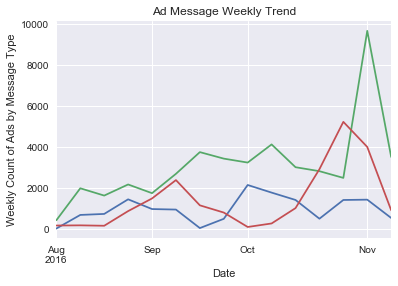

In [118]:
# Using MATLAB-style tools, pyplot interface (pg. 222)

weekly_pro.plot()
weekly_con.plot()
weekly_mixed.plot()
# weekly_unknown.plot()

plt.title("Ad Message Weekly Trend")
plt.xlabel("Date")
plt.ylabel("Weekly Count of Ads by Message Type")
# plt.legend()

# blue = pro
# green = con
# red = mixed
# purple = unknown

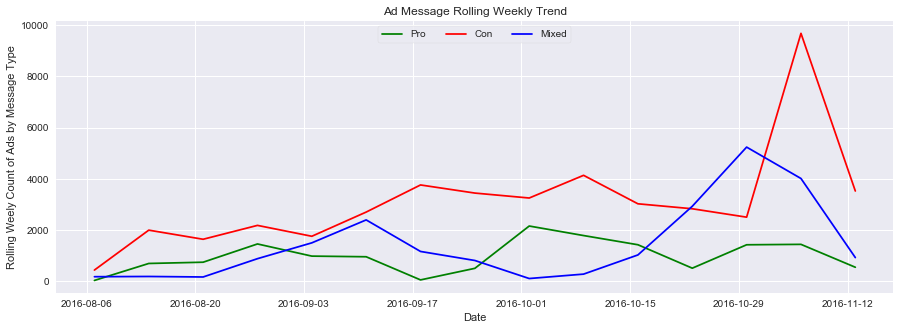

In [185]:
# See Python Data Science Handbook, Chapter 4 (from page 217)
# This is the object-oriented interface -- more control, more powerful

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(weekly_pro.index, weekly_pro.values, '-g', label='Pro')
ax.plot(weekly_con.index, weekly_con.values, '-r', label='Con')
ax.plot(weekly_mixed.index, weekly_mixed.values, '-b', label='Mixed')
ax.legend(frameon=True, loc='upper center', ncol=3) # look at doc string, has the legend location codes
ax.set(xlabel='Date', 
       ylabel='Rolling Weely Count of Ads by Message Type', 
       title='Ad Message Rolling Weekly Trend')
# plt.savefig('proposal_pics/ad_message_wkly_trend.png')

[(0, 16000),

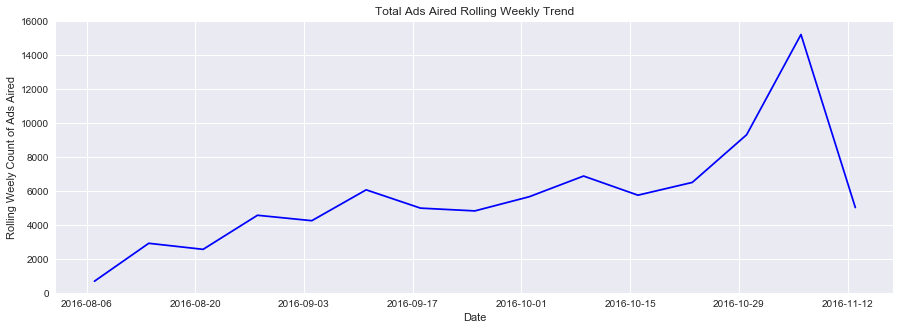

In [184]:
# Rolling Weekly Trend in Ads Aired

wkly_total_aired = pres_date_df['id'].resample('W').count()

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(wkly_total_aired.index, wkly_total_aired.values, '-b')
ax.set(xlabel='Date', 
       ylabel='Rolling Weely Count of Ads Aired',
       ylim=(0, 16000),
       title='Total Ads Aired Rolling Weekly Trend')
# plt.savefig('proposal_pics/total_ads_aired_wkly_trend.png')

In [163]:
pres_date_df['sponsors'].unique()

# May have to manually go through each of these sponsors to see who they supported - doable amount - 45
# Also to make apples to apples comps of just sticking to PRES, remove senate ads classified as PRES
# Stick to two major party candidates or continue to include 3rd party candidates -- Johnson/Stein
# Can get candidate committee via visual inspection

array(['Reform America Fund', 'Hillary for America',
       'Make America Number One', 'Rebuilding America Now',
       'NextGen California Action Committee', 'Women Vote!',
       'Reclaim America PAC', 'Priorities USA Action',
       'Donald J Trump For President', 'Kirkpatrick For Senate',
       'Friends of Patrick Murphy', 'MoveOn.org', 'Our Principles PAC',
       'Correct The Record', 'Marco Rubio For Senate 2016',
       'Republican National Cmte', 'Gary Johnson 2016',
       'Great America PAC', 'Stop Hillary PAC', 'National Rifle Assn',
       'Ready for Hillary', 'Democratic Senatorial Campaign Cmte',
       'Purple PAC', 'Jill Stein for President', 'Strickland for Senate',
       'Free the Delegates', 'NARAL Pro-Choice America',
       'American Bridge 21st Century', 'Hillary Victory Fund',
       'Democratic National Cmte', 'Fenton Communications Inc',
       'America Rising PAC', 'NextGen Climate Action', 'Save the Day PAC',
       'Future45', 'Donald J. Trump For Preside

In [155]:
pres_date_df['sponsors'].nunique()

45

In [151]:
pres_date_df['sponsor_types'].unique()

array(['Super PAC', 'Multiple', 'PAC', 'Candidate Committee',
       'Hybrid Super PAC', 'Unknown', 'Joint Fundraising Committee',
       'Corporation', 'Non Profit'], dtype=object)

In [152]:
# Trend in sponsor type
# resampling to get weekly data to smooth out chart - rolling weekly data

wkly_candidate = pres_date_df['sponsor_types'][pres_date_df['sponsor_types'] == 'Candidate Committee'].resample('W').count()
wkly_PAC = pres_date_df['sponsor_types'][(pres_date_df['sponsor_types'] == 'Super PAC') | 
                                         (pres_date_df['sponsor_types'] == 'PAC') |
                                         (pres_date_df['sponsor_types'] == 'Hybrid Super PAC')
                                        ].resample('W').count()

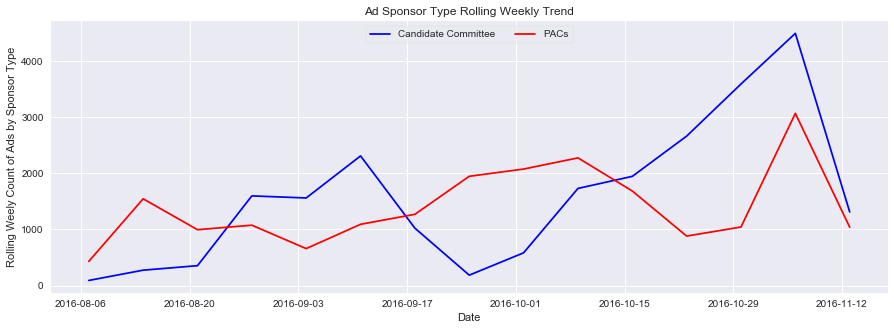

In [183]:
# Ad Sponsor Type

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(wkly_candidate.index, wkly_candidate.values, '-b', label='Candidate Committee')
ax.plot(wkly_PAC.index, wkly_PAC.values, '-r', label='PACs')
ax.legend(frameon=True, loc='upper center', ncol=2) # look at doc string, has the legend location codes
ax.set(xlabel='Date', 
       ylabel='Rolling Weely Count of Ads by Sponsor Type', 
       title='Ad Sponsor Type Rolling Weekly Trend')
# plt.savefig('proposal_pics/sponsor_type_wkly_trend.png')

In [158]:
# Who funded the mud? -- Mask proof of concept

pres_date_df[(pres_date_df['message'] == 'con') & (pres_date_df['sponsor_types'] == 'Candidate Committee')].head(2)

id  wp_identifier   network  \
start_time                                            
2016-08-02 01:21:04  48656           4168  FOXNEWSW   
2016-08-02 13:46:27   3767           5495  FOXNEWSW   

                                               location  \
start_time                                                
2016-08-02 01:21:04  San Francisco-Oakland-San Jose, CA   
2016-08-02 13:46:27  San Francisco-Oakland-San Jose, CA   

                                                               program  \
start_time                                                               
2016-08-02 01:21:04                                     The Kelly File   
2016-08-02 13:46:27  Americas Newsroom With Bill Hemmer and Martha ...   

                    program_type          start_time            end_time  \
start_time                                                                 
2016-08-02 01:21:04         news 2016-08-02 01:21:04 2016-08-02 01:22:04   
2016-08-02 13:46:27         news 2016-08-02 13:46:27 2016-08-02 13:47:47   

                                     archive_id  \
start_time                                        
2016-08-02 01:21:04  PolAd_HillaryClinton_ka4jq   
2016-08-02 13:46:27  PolAd_HillaryClinton_ao5qw   

                                                             embed_url  \
start_time                                                               
2016-08-02 01:21:04  https://archive.org/embed/PolAd_HillaryClinton...   
2016-08-02 13:46:27  https://archive.org/embed/PolAd_HillaryClinton...   

                                         sponsors        sponsor_types  race  \
start_time                                                                     
2016-08-02 01:21:04  Donald J Trump For President  Candidate Committee  PRES   
2016-08-02 13:46:27  Donald J Trump For President  Candidate Committee  PRES   

                      cycle             subjects       candidates      type  \
start_time                                                                    
2016-08-02 01:21:04  2016.0  Candidate Biography  Hillary Clinton  campaign   
2016-08-02 13:46:27  2016.0  Candidate Biography  Hillary Clinton  campaign   

                    message        date_created  ad_length day_of_week  \
start_time                                                               
2016-08-02 01:21:04     con 2016-09-12 14:51:52       60.0     Tuesday   
2016-08-02 13:46:27     con 2016-09-12 14:49:45       80.0     Tuesday   

                                         metro_area     state  subject_count  \
start_time                                                                     
2016-08-02 01:21:04  San Francisco-Oakland-San Jose  National            1.0   
2016-08-02 13:46:27  San Francisco-Oakland-San Jose  National            1.0   

                     hour_aired     split_subjects_tmp  
start_time                                              
2016-08-02 01:21:04           1  [Candidate Biography]  
2016-08-02 13:46:27          13  [Candidate Biography]

In [160]:
# Who funded the mud? -- Mask proof of concept

neg_ad_candidate = pres_date_df['message'][(pres_date_df['message'] == 'con') &
                                           (pres_date_df['sponsor_types'] == 'Candidate Committee')
                                          ].resample('W').count()

neg_ad_PAC = pres_date_df['message'][(pres_date_df['message'] == 'con') &
                                     ((pres_date_df['sponsor_types'] == 'Super PAC') | 
                                      (pres_date_df['sponsor_types'] == 'PAC') |
                                      (pres_date_df['sponsor_types'] == 'Hybrid Super PAC'))
                                    ].resample('W').count()

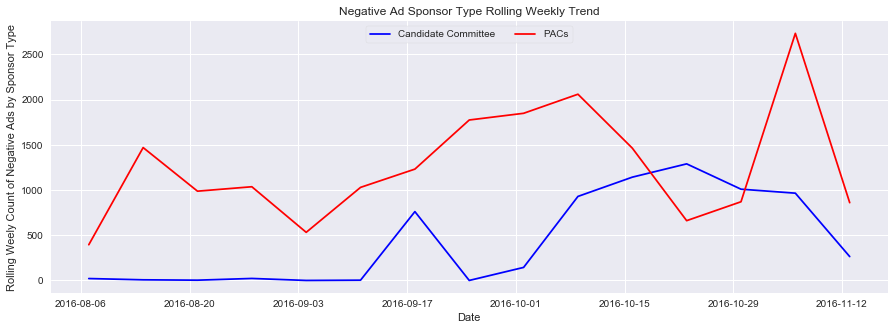

In [182]:
# Who funded the mud? -- Chart

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(neg_ad_candidate.index, neg_ad_candidate.values, '-b', label='Candidate Committee')
ax.plot(neg_ad_PAC.index, neg_ad_PAC.values, '-r', label='PACs')
ax.legend(frameon=True, loc='upper center', ncol=2) # look at doc string, has the legend location codes
ax.set(xlabel='Date', 
       ylabel='Rolling Weely Count of Negative Ads by Sponsor Type', 
       title='Negative Ad Sponsor Type Rolling Weekly Trend')
# plt.savefig('proposal_pics/neg_ad_sponsor_type_wkly_trend.png')